<a href="https://colab.research.google.com/github/dglcn/Proyek-akhir-analisis-data/blob/main/Copy_of_Proyek_Analisis_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: [Bike-sharing-dataset]
- **Nama:** [Kanaya Defitra Prasetyo Putri]
- **Email:** [m180b4kx2134@bangkit.academy]
- **ID Dicoding:** [JLX14G8EGX72]

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 \
Bagaimana pengaruh kondisi cuaca terhadap pengguna sepeda?
- Pertanyaan 2 \
Bagaimana pola penggunaan sepeda berdasarkan tipe hari?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

Proyek ini akan melakukan pengolahan data mentah dari dataset Bike-sharing-dataset untuk menjawab pertanyaan bisnis yang tertera.

In [ ]:
df = pd.read_csv('day.csv')
df.rename(columns={'instant': 'record index'}, inplace=True)
df.rename(columns={'dteday': 'date'}, inplace=True)
df.rename(columns={'yr': 'year'}, inplace=True)
df.rename(columns={'mnth': 'month'}, inplace=True)
df.rename(columns={'hr': 'hour'}, inplace=True)
df.rename(columns={'weathersit': 'weather situation'}, inplace=True)
df.rename(columns={'temp': 'temperature'}, inplace=True)
df.rename(columns={'atemp': 'feeling temperature'}, inplace=True)
df.rename(columns={'hum': 'humidity'}, inplace=True)
df.rename(columns={'windspeed': 'wind speed'}, inplace=True)
df.rename(columns={'casual': 'casual users'}, inplace=True)
df.rename(columns={'registered': 'registered users'}, inplace=True)
df.rename(columns={'cnt': 'total users'}, inplace=True)

df2 = pd.read_csv('hour.csv')
df2.rename(columns={'instant': 'record index'}, inplace=True)
df2.rename(columns={'dteday': 'date'}, inplace=True)
df2.rename(columns={'yr': 'year'}, inplace=True)
df2.rename(columns={'mnth': 'month'}, inplace=True)
df2.rename(columns={'hr': 'hour'}, inplace=True)
df2.rename(columns={'weathersit': 'weather situation'}, inplace=True)
df2.rename(columns={'temp': 'temperature'}, inplace=True)
df2.rename(columns={'atemp': 'feeling temperature'}, inplace=True)
df2.rename(columns={'hum': 'humidity'}, inplace=True)
df2.rename(columns={'windspeed': 'wind speed'}, inplace=True)
df2.rename(columns={'casual': 'casual users'}, inplace=True)
df2.rename(columns={'registered': 'registered users'}, inplace=True)
df2.rename(columns={'cnt': 'total users'}, inplace=True)
print(df)
print(df2)
print(df.info())
print(df2.info())

     record index        date  season  year  month  holiday  weekday  \
0               1  2011-01-01       1     0      1        0        6   
1               2  2011-01-02       1     0      1        0        0   
2               3  2011-01-03       1     0      1        0        1   
3               4  2011-01-04       1     0      1        0        2   
4               5  2011-01-05       1     0      1        0        3   
..            ...         ...     ...   ...    ...      ...      ...   
726           727  2012-12-27       1     1     12        0        4   
727           728  2012-12-28       1     1     12        0        5   
728           729  2012-12-29       1     1     12        0        6   
729           730  2012-12-30       1     1     12        0        0   
730           731  2012-12-31       1     1     12        0        1   

     workingday  weather situation  temperature  feeling temperature  \
0             0                  2     0.344167             0.3

### Gathering Data

Dikarenakan terdapat dua dataset; \
*   **day.csv** yang menampilkan jumlah peminjaman sepeda perhari
*   **hour.csv** yang menampilkan jumlah peminjaman sepeda perjam

Pada tahap gathering data, akan dilakukan penggabungan dari kedua dataset tersebut.

In [ ]:
merged_df = pd.merge(df, df2, on='record index', suffixes=('_day', '_hour'))
print(merged_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   record index              731 non-null    int64  
 1   date_day                  731 non-null    object 
 2   season_day                731 non-null    int64  
 3   year_day                  731 non-null    int64  
 4   month_day                 731 non-null    int64  
 5   holiday_day               731 non-null    int64  
 6   weekday_day               731 non-null    int64  
 7   workingday_day            731 non-null    int64  
 8   weather situation_day     731 non-null    int64  
 9   temperature_day           731 non-null    float64
 10  feeling temperature_day   731 non-null    float64
 11  humidity_day              731 non-null    float64
 12  wind speed_day            731 non-null    float64
 13  casual users_day          731 non-null    int64  
 14  registered

### Assessing Data

Kita akan memeriksa apakah ada kesalahan dalam data. Jika ada, maka akan dilakukan *cleaning data*.

In [ ]:
print(df.isnull().sum())
print(df2.isnull().sum())
print(df.info())
print(df2.info())

record index           0
date                   0
season                 0
year                   0
month                  0
holiday                0
weekday                0
workingday             0
weather situation      0
temperature            0
feeling temperature    0
humidity               0
wind speed             0
casual users           0
registered users       0
total users            0
dtype: int64
record index           0
date                   0
season                 0
year                   0
month                  0
hour                   0
holiday                0
weekday                0
workingday             0
weather situation      0
temperature            0
feeling temperature    0
humidity               0
wind speed             0
casual users           0
registered users       0
total users            0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dt

### Cleaning Data (tidak dilakukan karena datasetnya bersih)

## Exploratory Data Analysis (EDA)

### Explore Data Analysis Pertanyaan 1
Bagaimana pengaruh kondisi cuaca terhadap pengguna sepeda? \

Kita akan melakukan pengelompokkan terhadap data yang mempengaruhi pertanyaan ini, yaitu *weather situation*.

In [ ]:
usage_by_weather = df.groupby('weather situation')['total users'].sum()
usage_by_weather2 = df2.groupby('weather situation')['total users'].sum()
print(usage_by_weather)
print(usage_by_weather2)

weather situation
1    2257952
2     996858
3      37869
Name: total users, dtype: int64
weather situation
1    2338173
2     795952
3     158331
4        223
Name: total users, dtype: int64


### Explore Data Analysis Pertanyaan 2
Bagaimana pola penggunaan sepeda berdasarkan tipe hari? \

Kita akan melakukan pengelompokkan terhadap data yang mempengaruhi pertanyaan ini, yaitu tipe hari

In [ ]:
merged_df = pd.merge(df, df2, on='record index', suffixes=('_day', '_hour'))
def get_day_type_day(row):
    if row['weekday_day'] in [0,6]:
      return 'weekend'
    elif row['holiday_day'] == 1:
      return 'holiday'
    else:
      return 'workingday'
merged_df['day_type'] = merged_df.apply(get_day_type_day, axis=1)
summary_day_type = merged_df.groupby('day_type')['total users_day'].sum().reset_index()

def get_day_type_hour(row):
    if row['weekday_hour'] in [0,6]:
      return 'weekend'
    elif row['holiday_day'] == 1:
      return 'holiday'
    else:
      return 'workingday'
merged_df['day_type2'] = merged_df.apply(get_day_type_hour, axis=1)
summary_day_type2 = merged_df.groupby('day_type2')['total users_hour'].sum().reset_index()
print(summary_day_type)
print(summary_day_type2)

     day_type  total users_day
0     holiday            78435
1     weekend           921834
2  workingday          2292410
    day_type2  total users_hour
0     holiday              1019
1     weekend             10180
2  workingday             29666


## Visualization & Explanatory Analysis

### Pertanyaan 1:
Bagaimana pengaruh kondisi cuaca terhadap pengguna sepeda?

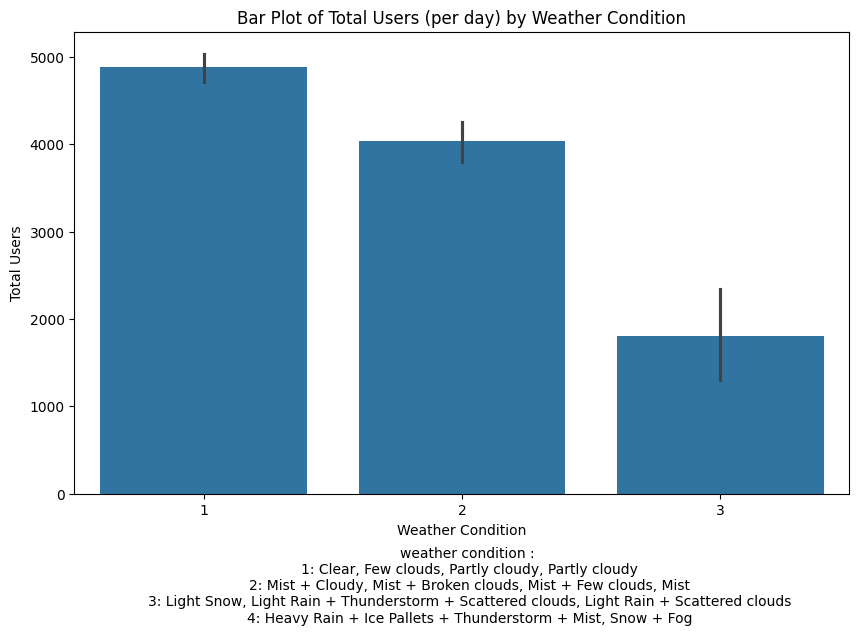

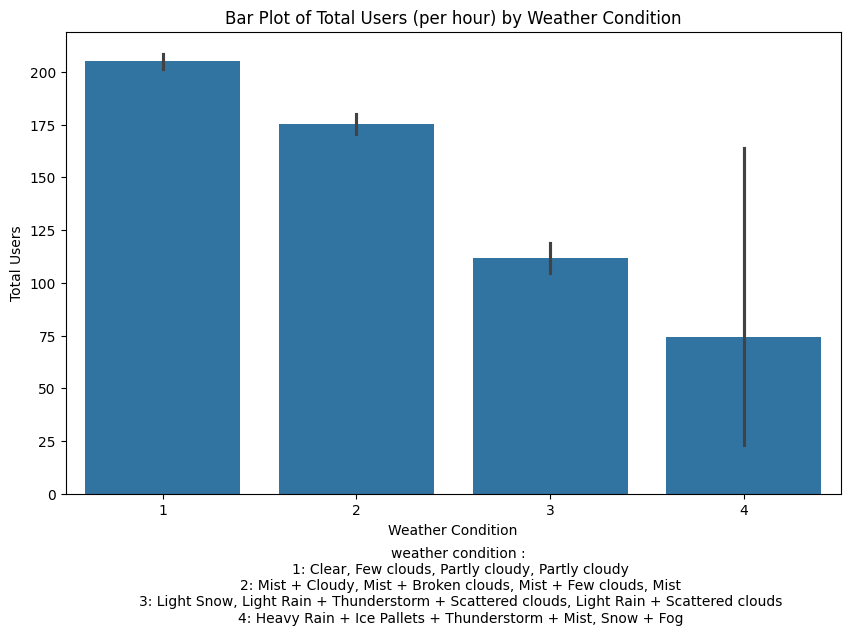

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x='weather situation', y='total users', data=df)
plt.title('Bar Plot of Total Users (per day) by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Total Users')
plt.figtext(0.52,-0.1, 'weather condition : \n\
1: Clear, Few clouds, Partly cloudy, Partly cloudy\n\
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist\n\
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds\n\
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog', wrap=True, horizontalalignment='center', fontsize=10)
plt.figure(figsize=(10,6))
sns.barplot(x='weather situation', y='total users', data=df2)
plt.title('Bar Plot of Total Users (per hour) by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Total Users')
plt.figtext(0.52,-0.1, 'weather condition : \n\
1: Clear, Few clouds, Partly cloudy, Partly cloudy\n\
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist\n\
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds\n\
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog', wrap=True, horizontalalignment='center', fontsize=10)
plt.show()



### Pertanyaan 2:
Bagaimana pola penggunaan sepeda berdasarkan tipe hari?

Text(0, 0.5, 'Total Users')

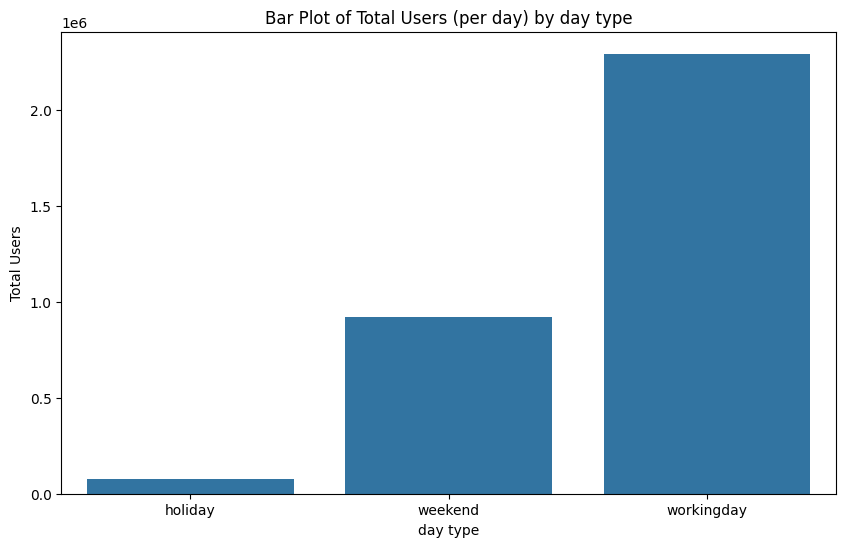

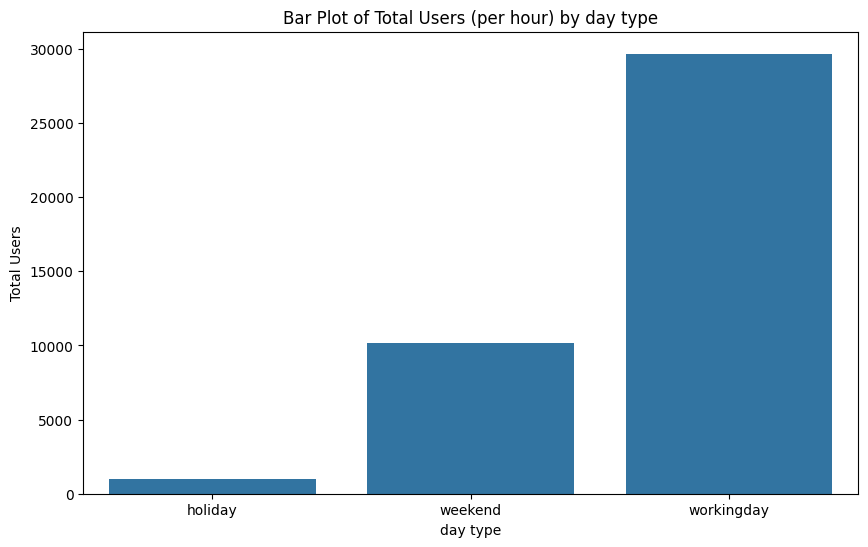

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x='day_type', y='total users_day', data=summary_day_type)
plt.title('Bar Plot of Total Users (per day) by day type')
plt.xlabel('day type')
plt.ylabel('Total Users')

plt.figure(figsize=(10,6))
sns.barplot(x='day_type2', y='total users_hour', data=summary_day_type2)
plt.title('Bar Plot of Total Users (per hour) by day type')
plt.xlabel('day type')
plt.ylabel('Total Users')

## Analisis Lanjutan (Opsional)

Analisis lanjutan pertanyaan 1 (analisis korelasi) \
Bagaimana pengaruh kondisi cuaca terhadap pengguna sepeda?

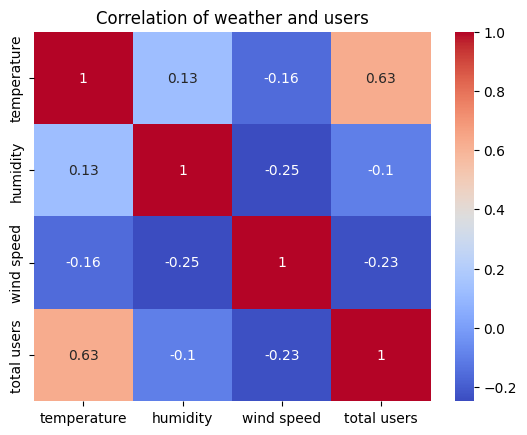

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [ ]:
corr_matrix = df[['temperature', 'humidity', 'wind speed', 'total users']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation of weather and users')
plt.show()
plt.figure(figsize=(10, 6))

*  Insight: \
   1. **Temperature & total users**: korelasi 0.63 yang menunjukkan hubungan positif kuat yang artinya semakin tinggi suhu, maka semakin banyak pengguna sepeda.
   2. **Humidity & total users**: korelasi -0.1 yang menunjukkan hubungan negatif lemah yang artinya ada sedikit hubungan antara kelembaban dan pengguna sepeda, namun dampaknya tidak terlalu signifikan.
   3. **Wind speed & total users**: korelasi -0.23 yang menunjukkan hubungan negatif sedang yang artinya semakin tinggi kecepatan angin, maka semakin sedikit pengguna sepeda.
   4. **Temperature & humidity**: korelasi 0.13 yang menunjukkan hubungan positif lemah yang artinya ada sedikit hubungan antara peningkatan suhu dan peningkatan kelembaban, namun dampaknya tidak terlalu signifikan.
   5. **Temperature & wind speed**: korelasi -0.16 yang menunjukkan hubungan negatif lemah yang artinya semakin tinggi suhu, maka kecepatan angin cenderung sedikit menurun.
   6. **Humidity & wind speed**: korelasi -0.25 yang menunjukkan hubungan negatif sedang yang artinya semakin tinggi kelembaban, maka kecepatan angin cenderung lebih rendah.







## Conclusion

- Conclution pertanyaan 1 \
  Kondisi cuaca sangat mempengaruhi rental sepeda. Dengan kondisi:
  1. Pengguna sepeda paling banyak berada di saat cuaca sedang cerah, sedikit awan, sebagian berawan.
  2. Urutan kedua pengguna sepeda paling banyak berada di saat cuaca sedang berkabut+berawan, kabut+awan pecah, kabut+sedikit awan, kabut.
  3. Urutan ketiga pengguna sepeda paling banyak berada di saat cuaca sedang sedikit bersalju, gerimis+badai petir+awan gelap, hujan deras+awan gelap.
  4. Dan pengguna sepeda paling sedikit berada pada saat cuaca sedang hujan lebat+palet es+badai petir+kabut, salju+kabut.


  
- Conclution pertanyaan 2
  Tipe hari juga mempengaruhi pola penyewaan sepeda. Dengan kondisi:
  1. Penggguna sepeda paling banyak berada di tipe hari kerja.
  2. Penggguna sepeda paling banyak kedua berada di tipe hari akhir pekan.
  3. Penggguna sepeda paling sedikit berada di tipe hari liburan.




In [ ]:
all_df = pd.merge(df, df2, on='record index', suffixes=('_day', '_hour'))
all_df.to_csv('all_data.csv', index=False)